In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [133]:
churn = pd.read_csv('Churn.csv')
pd.set_option('display.max_columns', None)
churn = churn.drop('Unnamed: 0', axis = 1)
churn.head()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Regular_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Gender,Age,Married,Number_of_Dependents,Zip_Code,Population,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction,Churn_Value
0,1,1,25,3.0,1,19.76,0,1,1.0,13,0,1,1,0,1,1,0,0,3,1,1,102.440,2514.50,13.43,327.0,494.00,2,78,1,1,90303,27778,5337,2.0,1,1,1,1
1,1,1,37,3.0,1,6.33,1,1,2.0,15,0,0,0,0,0,0,0,0,3,1,1,79.560,2868.15,0.00,430.0,234.21,2,80,1,1,90602,26265,2793,3.0,1,0,1,1
2,0,0,27,3.0,1,3.33,1,1,1.0,20,0,0,1,0,0,0,0,0,3,1,1,81.172,2135.50,0.00,427.0,89.91,2,72,0,1,90660,63288,4638,1.0,0,0,1,1
3,1,1,1,5.0,1,15.28,0,1,2.0,33,0,0,0,0,0,0,0,0,3,1,3,73.268,70.45,0.00,0.0,15.28,2,76,1,2,90720,21343,3964,5.0,7,0,1,1
4,1,6,58,2.0,0,0.00,0,1,2.0,26,0,1,1,0,0,1,0,0,3,1,1,47.112,2651.20,40.95,689.0,0.00,1,66,1,0,91024,10558,5444,2.0,2,1,1,1


In [134]:
mmx = MinMaxScaler()

X = churn.iloc[:, 0:37] 
y = churn.iloc[:, -1]

X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    stratify = y, 
                                                    random_state = 0)

In [135]:
knn_param = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
knnCV = GridSearchCV(knn, knn_param)
knnCV.fit(X_train, y_train)
print(knnCV.best_estimator_)
y_pred = knnCV.predict(X_train)
print(f1_score(y_train, y_pred))

KNeighborsClassifier(n_neighbors=3)
0.9857627118644068


[array([25,  6,  7, 26, 34,  9, 35, 30, 18, 33, 22, 16, 36,  2, 10, 17, 14,
       23]), array([28, 24, 25, 18, 26,  9, 13, 33, 23, 12, 16,  6, 17,  4,  1, 34,  5,
       36]), array([25, 20, 16,  0,  9, 34, 24, 35, 11, 18, 21, 36, 23, 13, 32,  7, 26,
        2]), array([31, 23, 12, 32, 27, 14, 18, 10, 28,  8,  7, 17, 11, 35, 21, 25, 24,
       13]), array([ 9, 31, 16, 36, 10, 13, 22, 17, 27, 18, 34,  7,  5, 35, 28,  3,  4,
        6]), array([27,  4, 14, 22,  2,  7,  3, 15, 26, 19,  1, 31,  9, 16, 18, 10, 20,
       28]), array([27, 20, 35, 32,  5, 24,  0, 23, 25,  4,  3, 29, 22, 26, 10, 30, 13,
       12]), array([ 3, 11, 23,  5, 12, 36, 10, 33,  7,  6, 24,  2, 14, 34,  9,  8, 15,
       17]), array([ 9,  5, 13,  8, 10, 18, 23, 29, 25, 11, 28,  1, 31, 24,  7, 35, 21,
       33]), array([36, 11, 30,  5, 18,  9, 32,  0, 33,  7, 16, 27, 24, 12, 31, 25, 35,
        8])]
0.9936079545454546
0.9763849431818182


0.9877883310719131

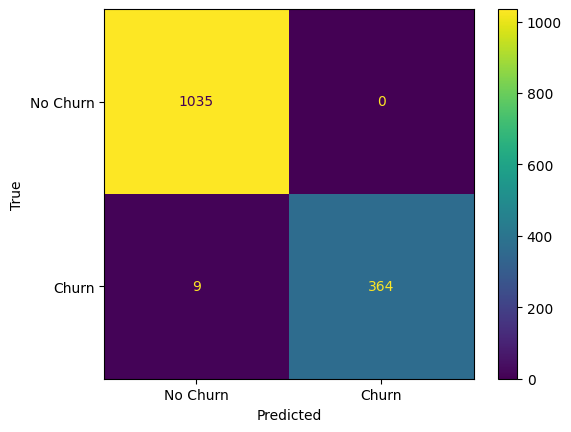

In [137]:
knn = KNeighborsClassifier(n_neighbors = 3)
clf = BaggingClassifier(estimator = knn, 
                        n_estimators = 10, 
                        max_samples = 0.8, 
                        max_features = 0.5,
                        oob_score = True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.estimators_features_)
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['No Churn', 'Churn'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print(accuracy_score(y_test,y_pred))
print(clf.oob_score_)
f1_score(y_test, y_pred)

In [ ]:
feature_names = churn.columns
for i, estimator_features in enumerate(clf.estimators_features_):
    used_features = [feature_names[idx] for idx in estimator_features]
    print(f"Feature {i+1}: {used_features}")

Feature 1: ['Monthly_Charge', 'Age', 'Paperless_Billing', 'Avg_Monthly_Long_Distance_Charges', 'Payment_Method', 'Streaming_TV', 'Internet_Type', 'Product/Service_Issues_Reported', 'Offer', 'Customer_Satisfaction', 'Device_Protection_Plan', 'Total_Customer_Svc_Requests', 'Total_Extra_Data_Charges', 'Total_Refunds', 'Avg_Monthly_GB_Download', 'Population', 'Contract', 'Internet_Service']
Feature 2: ['Married', 'Product/Service_Issues_Reported', 'Online_Backup', 'Unlimited_Data', 'Customer_Satisfaction', 'Device_Protection_Plan', 'Phone_Service', 'Tenure_in_Months', 'Total_Customer_Svc_Requests', 'Number_of_Referrals', 'Avg_Monthly_Long_Distance_Charges', 'Offer', 'Zip_Code', 'Payment_Method', 'Total_Refunds', 'Internet_Type', 'Streaming_TV', 'Total_Long_Distance_Charges']
Feature 3: ['Internet_Service', 'Number_of_Dependents', 'Paperless_Billing', 'Tenure_in_Months', 'Age', 'Zip_Code', 'Churn_Category', 'Streaming_TV', 'Product/Service_Issues_Reported', 'Contract', 'Multiple_Lines', 'In